In [1]:
import pandas as pd
import requests
import pprint
from config import api_key
import matplotlib.pyplot as plt

In [2]:
# read in individual country files
us_file = pd.read_csv("Video_CSVs/USvideos.csv")
gb_file = pd.read_csv("Video_CSVs/GBvideos.csv")
ca_file = pd.read_csv("Video_CSVs/CAvideos.csv")

In [3]:
# get api data to add category names
params = {"part":"snippet","regionCode":"US",
           "key":api_key}
base_url= "https://www.googleapis.com/youtube/v3/videoCategories"
response = requests.get(base_url, params=params).json()

# collect category names to add to a dataframe
id_list = []
title_list = []
for i in response['items']:
    #print(i)
    id_list.append(i['id'])
    title_list.append(i['snippet']['title'])

# Create DF
category_df=pd.DataFrame({"category_id":id_list,"title_list":title_list})
category_df["category_id"]=category_df["category_id"].astype("int64")
category_df.dtypes

category_id     int64
title_list     object
dtype: object

In [4]:
# Merge with us_df
us_df=pd.merge(us_file,category_df,on='category_id',how="left")
# focus on data we are interested in
us_df=us_df.loc[:,("trending_date", "title", "channel_title", "title_list", "views", "likes", "dislikes")]
# rename columns
us_df=us_df.rename(columns={"video_id":"Video ID", 
                            "trending_date": "Trending Date",
                            'title': "Title",
                            "channel_title":"Channel Title",
                            'title_list': "Category ID",
                            'views':'Views', 
                            "likes": 'Likes', 
                            'dislikes': "Dislikes",
                            'comment_count': 'Comment Count'})

In [5]:
# Merge with gb_df
gb_df=pd.merge(gb_file,category_df,on='category_id',how="left")
# focus on data we are interested in
gb_df.drop(columns=["publish_time","tags","thumbnail_link","comments_disabled","ratings_disabled",
                    "video_error_or_removed","description",'category_id'],inplace=True)
#Renaming the Columns 
gb_df=gb_df.rename(columns={"video_id":"Video ID", "trending_date": "Trending Date",'title': "Title", 
                        "channel_title":"Channel Title", 
                       'title_list': "Category ID", 'views':'Views', "likes": 'Likes', 'dislikes': "Dislikes",
                        'comment_count': 'Comment Count'})

In [6]:
# Merge with ca_df
ca_df=pd.merge(ca_file,category_df,on='category_id',how="left")
# focus on data we are interested in
ca_df=ca_df.loc[:,("trending_date", "title", "channel_title", "title_list", "views", "likes", "dislikes")]
# rename columns
ca_df=ca_df.rename(columns={"video_id":"Video ID", 
                            "trending_date": "Trending Date",
                            'title': "Title",
                            "channel_title":"Channel Title",
                            'title_list': "Category ID",
                            'views':'Views', 
                            "likes": 'Likes', 
                            'dislikes': "Dislikes",
                            'comment_count': 'Comment Count'})

# Category Analysis

## Top Viewed Categories in Each Country

Text(0.5, 1.0, 'Total Video Views of Each Youtube Category in US')

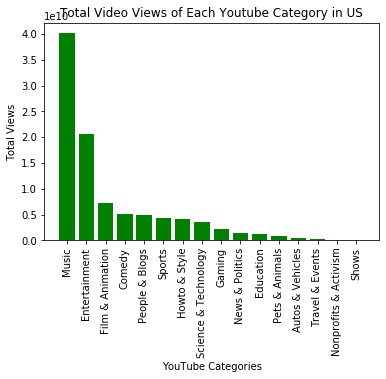

In [7]:
# US Category Analysis - TOP VIEWS
#Finding the Sum of Views 
Views_Category_US=us_df.groupby('Category ID').sum()["Views"]
Views_Category_US_df=pd.DataFrame(Views_Category_US)
Views_Category_US_df=Views_Category_US_df.reset_index()
Views_Category_US_df=Views_Category_US_df.sort_values("Views", ascending=False)
Views_Category_US_df

# create labels
catviews_labels_us = Views_Category_US_df["Category ID"]

# create bar plot that shows all views, likes, dislikes for each category
plt.bar(catviews_labels_us,Views_Category_US_df["Views"], color="g",alpha=1,align="center")
plt.xticks(catviews_labels_us, rotation='vertical')
plt.ylabel("Total Views")
plt.xlabel("YouTube Categories")
plt.title("Total Video Views of Each Youtube Category in US")

Text(0.5, 1.0, 'Top 5 Viewed YouTube Categories in US')

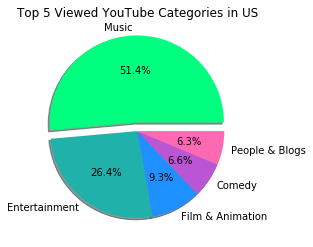

In [8]:
# Create a Pie Chart to show top five viewed categories
Top_5_CategoryID_Views_US=Views_Category_US_df.sort_values("Views", ascending=False)
Top5Viewed_US=Top_5_CategoryID_Views_US.head(5)

# create pie plot for the top viewed categories in YouTube
# Tells matplotlib to seperate the "Music" (#1 category) section from the others
explode = (0.1, 0, 0, 0, 0)
colors = ["springgreen", "lightseagreen", "dodgerblue", "mediumorchid", "hotpink"]
plt.pie(Top5Viewed_US["Views"], explode=explode, labels=Top5Viewed_US["Category ID"], colors = colors, autopct="%1.1f%%", shadow=True)
plt.title("Top 5 Viewed YouTube Categories in US")

Text(0.5, 1.0, 'Total Video Views of Each Youtube Category in GB')

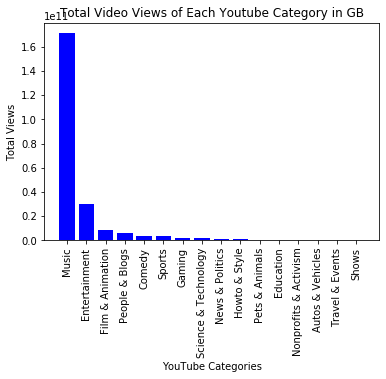

In [9]:
# GB Category Analysis - TOP VIEWS
#Finding the Sum of Views 
Views_Category_GB=gb_df.groupby('Category ID').sum()["Views"]
Views_Category_GB_df=pd.DataFrame(Views_Category_GB)
Views_Category_GB_df=Views_Category_GB_df.reset_index()
Views_Category_GB_df=Views_Category_GB_df.sort_values("Views", ascending=False)
Views_Category_GB_df

# create labels
catviews_labels_gb = Views_Category_GB_df["Category ID"]

# create bar plot that shows all views, likes, dislikes for each category
plt.bar(catviews_labels_gb,Views_Category_GB_df["Views"], color="b",alpha=1,align="center")
plt.xticks(catviews_labels_gb, rotation='vertical')
plt.ylabel("Total Views")
plt.xlabel("YouTube Categories")
plt.title("Total Video Views of Each Youtube Category in GB")

Text(0.5, 1.0, 'Top 5 Viewed YouTube Categories in GB')

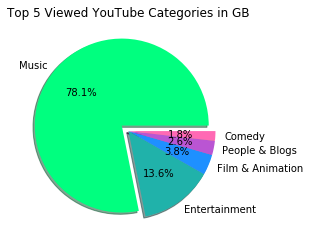

In [10]:
# Create a Pie Chart to show top five viewed categories
Top_5_CategoryID_Views_GB=Views_Category_GB_df.sort_values("Views", ascending=False)
Top5Viewed_GB=Top_5_CategoryID_Views_GB.head(5)

# create pie plot for the top viewed categories in YouTube
# Tells matplotlib to seperate the #1 category section from the others
explode = (0.1, 0, 0, 0, 0)
colors = ["springgreen", "lightseagreen", "dodgerblue", "mediumorchid", "hotpink"]
plt.pie(Top5Viewed_GB["Views"], explode=explode, labels=Top5Viewed_GB["Category ID"], colors = colors, autopct="%1.1f%%", shadow=True)
plt.title("Top 5 Viewed YouTube Categories in GB")

Text(0.5, 1.0, 'Total Video Views of Each Youtube Category in CA')

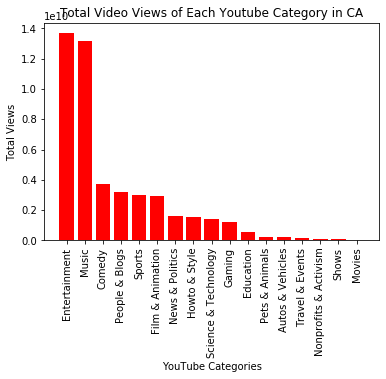

In [11]:
# CA Category Analysis - TOP VIEWS
#Finding the Sum of Views 
Views_Category_CA=ca_df.groupby('Category ID').sum()["Views"]
Views_Category_CA_df=pd.DataFrame(Views_Category_CA)
Views_Category_CA_df=Views_Category_CA_df.reset_index()
Views_Category_CA_df=Views_Category_CA_df.sort_values("Views", ascending=False)
Views_Category_CA_df

# create labels
catviews_labels_ca = Views_Category_CA_df["Category ID"]

# create bar plot that shows all views, likes, dislikes for each category
plt.bar(catviews_labels_ca,Views_Category_CA_df["Views"], color="r",alpha=1,align="center")
plt.xticks(catviews_labels_ca, rotation='vertical')
plt.ylabel("Total Views")
plt.xlabel("YouTube Categories")
plt.title("Total Video Views of Each Youtube Category in CA")

Text(0.5, 1.0, 'Top 5 Viewed YouTube Categories in CA')

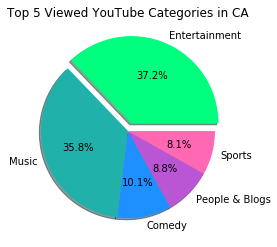

In [12]:
# Create a Pie Chart to show top five viewed categories
Top_5_CategoryID_Views_CA=Views_Category_CA_df.sort_values("Views", ascending=False)
Top5Viewed_CA=Top_5_CategoryID_Views_CA.head(5)

# create pie plot for the top viewed categories in YouTube
# Tells matplotlib to seperate the #1 category section from the others
explode = (0.1, 0, 0, 0, 0)
colors = ["springgreen", "lightseagreen", "dodgerblue", "mediumorchid", "hotpink"]
plt.pie(Top5Viewed_CA["Views"], explode=explode, labels=Top5Viewed_CA["Category ID"], colors = colors, autopct="%1.1f%%", shadow=True)
plt.title("Top 5 Viewed YouTube Categories in CA")

## Bottom Viewed Categories in Each Country

Text(0.5, 1.0, 'Bottom 5 Viewed YouTube Categories in the US')

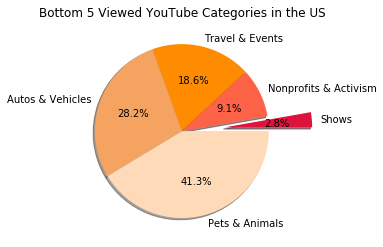

In [15]:
# US Category Analysis - BOTTOM VIEWED
Bottom_5_CategoryID_Views_US=Views_Category_US_df.sort_values("Views", ascending=True)
Bottom5Viewed_US=Bottom_5_CategoryID_Views_US.head(5)

# create pie plot for the least viewed categories in YouTube
# Tells matplotlib to seperate the least viewed section from the others
explode = (0.5, 0, 0, 0, 0)
colors = ["crimson", "tomato", "darkorange", "sandybrown", "peachpuff"]
plt.pie(Bottom5Viewed_US["Views"], explode=explode, labels=Bottom5Viewed_US["Category ID"], colors = colors, autopct="%1.1f%%", shadow=True)
plt.title("Bottom 5 Viewed YouTube Categories in the US")

Text(0.5, 1.0, 'Bottom 5 Viewed YouTube Categories in GB')

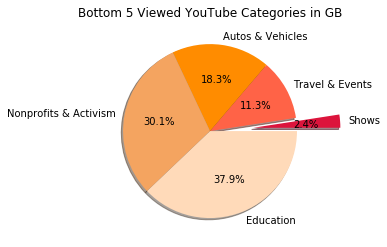

In [16]:
# GB Category Analysis - BOTTOM VIEWED
Bottom_5_CategoryID_Views_GB=Views_Category_GB_df.sort_values("Views", ascending=True)
Bottom5Viewed_GB=Bottom_5_CategoryID_Views_GB.head(5)

# create pie plot for the least viewed categories in YouTube
# Tells matplotlib to seperate the least viewed section from the others
explode = (0.5, 0, 0, 0, 0)
colors = ["crimson", "tomato", "darkorange", "sandybrown", "peachpuff"]
plt.pie(Bottom5Viewed_GB["Views"], explode=explode, labels=Bottom5Viewed_GB["Category ID"], colors = colors, autopct="%1.1f%%", shadow=True)
plt.title("Bottom 5 Viewed YouTube Categories in GB")

Text(0.5, 1.0, 'Bottom 5 Viewed YouTube Categories in CA')

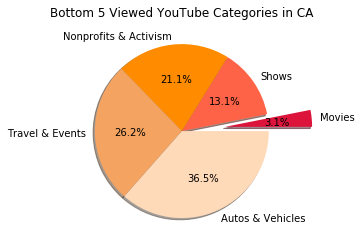

In [17]:
# GB Category Analysis - BOTTOM VIEWED
Bottom_5_CategoryID_Views_CA=Views_Category_CA_df.sort_values("Views", ascending=True)
Bottom5Viewed_CA=Bottom_5_CategoryID_Views_CA.head(5)

# create pie plot for the least viewed categories in YouTube
# Tells matplotlib to seperate the least viewed section from the others
explode = (0.5, 0, 0, 0, 0)
colors = ["crimson", "tomato", "darkorange", "sandybrown", "peachpuff"]
plt.pie(Bottom5Viewed_CA["Views"], explode=explode, labels=Bottom5Viewed_CA["Category ID"], colors = colors, autopct="%1.1f%%", shadow=True)
plt.title("Bottom 5 Viewed YouTube Categories in CA")

## Top Liked Categories in Each Country

Text(0.5, 1.0, 'Total Video Likes of Each Youtube Category in the US')

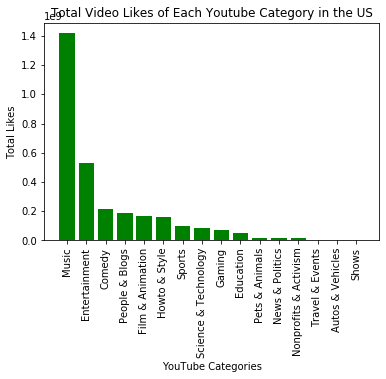

In [18]:
# US Category Analysis - TOP LIKED
#Finding the Sum of Likes 
Likes_Category_US=us_df.groupby('Category ID').sum()["Likes"]
Likes_Category_US_df=pd.DataFrame(Likes_Category_US)
Likes_Category_US_df=Likes_Category_US_df.reset_index()
Likes_Category_US_df = Likes_Category_US_df.sort_values("Likes", ascending=False)
Likes_Category_US_df

# create labels
catlikes_labels_us = Likes_Category_US_df["Category ID"]

# create bar plot that shows all views, likes, dislikes for each category
plt.bar(catlikes_labels_us,Likes_Category_US_df["Likes"], color="g",alpha=1,align="center")
plt.xticks(catlikes_labels_us, rotation='vertical')
plt.ylabel("Total Likes")
plt.xlabel("YouTube Categories")
plt.title("Total Video Likes of Each Youtube Category in the US")

Text(0.5, 1.0, 'Total Video Likes of Each Youtube Categoryin GB')

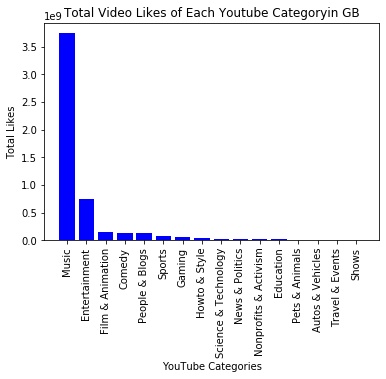

In [19]:
# GB Categoryu Analysis - TOP LIKED
#Finding the Sum of Likes 
Likes_Category_GB=gb_df.groupby('Category ID').sum()["Likes"]
Likes_Category_GB_df=pd.DataFrame(Likes_Category_GB)
Likes_Category_GB_df=Likes_Category_GB_df.reset_index()
Likes_Category_GB_df = Likes_Category_GB_df.sort_values("Likes", ascending=False)
Likes_Category_GB_df

# create labels
catlikes_labels_gb = Likes_Category_GB_df["Category ID"]

# create bar plot that shows all views, likes, dislikes for each category
plt.bar(catlikes_labels_gb,Likes_Category_GB_df["Likes"], color="b",alpha=1,align="center")
plt.xticks(catlikes_labels_gb, rotation='vertical')
plt.ylabel("Total Likes")
plt.xlabel("YouTube Categories")
plt.title("Total Video Likes of Each Youtube Categoryin GB")

Text(0.5, 1.0, 'Total Video Likes of Each Youtube Categoryin CA')

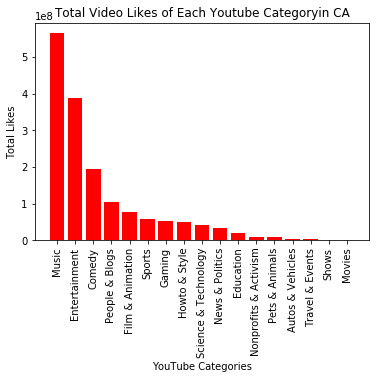

In [25]:
# CA Category Analysis - TOP LIKED
#Finding the Sum of Likes 
Likes_Category_CA=ca_df.groupby('Category ID').sum()["Likes"]
Likes_Category_CA_df=pd.DataFrame(Likes_Category_CA)
Likes_Category_CA_df=Likes_Category_CA_df.reset_index()
Likes_Category_CA_df = Likes_Category_CA_df.sort_values("Likes", ascending=False)
Likes_Category_CA_df

# create labels
catlikes_labels_ca = Likes_Category_CA_df["Category ID"]

# create bar plot that shows all views, likes, dislikes for each category
plt.bar(catlikes_labels_ca,Likes_Category_CA_df["Likes"], color="r",alpha=1,align="center")
plt.xticks(catlikes_labels_ca, rotation='vertical')
plt.ylabel("Total Likes")
plt.xlabel("YouTube Categories")
plt.title("Total Video Likes of Each Youtube Categoryin CA")

## Top Disliked Categories in Each Country

Text(0.5, 1.0, 'Total Video Dislikes of Each Youtube Category in US')

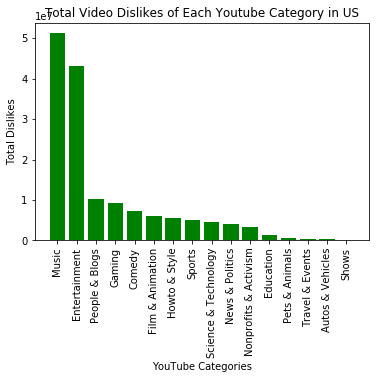

In [26]:
# US Category Analysis - TOP DISLIKED
#Finding the Sum of Dislikes 
Dislikes_Category_US=us_df.groupby('Category ID').sum()["Dislikes"]
Dislikes_Category_US_df=pd.DataFrame(Dislikes_Category_US)
Dislikes_Category_US_df=Dislikes_Category_US_df.reset_index()
Dislikes_Category_US_df=Dislikes_Category_US_df.sort_values("Dislikes",ascending=False)
Dislikes_Category_US_df

# create labels
catdislikes_labels_us = Dislikes_Category_US_df["Category ID"]

# create bar plot that shows all views, likes, dislikes for each category
plt.bar(catdislikes_labels_us,Dislikes_Category_US_df["Dislikes"], color="g",alpha=1,align="center")
plt.xticks(catdislikes_labels_us, rotation='vertical')
plt.ylabel("Total Dislikes")
plt.xlabel("YouTube Categories")
plt.title("Total Video Dislikes of Each Youtube Category in US")

Text(0.5, 1.0, 'Total Video Dislikes of Each Youtube Category in GB')

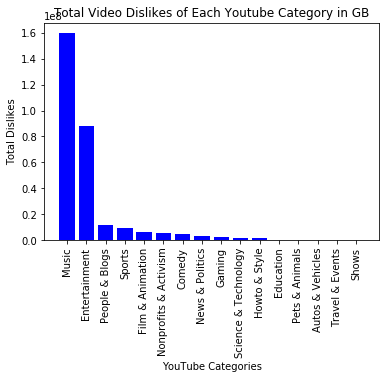

In [27]:
# GB Category Analysis - TOP DISLIKED
#Finding the Sum of Dislikes 
Dislikes_Category_GB=gb_df.groupby('Category ID').sum()["Dislikes"]
Dislikes_Category_GB_df=pd.DataFrame(Dislikes_Category_GB)
Dislikes_Category_GB_df=Dislikes_Category_GB_df.reset_index()
Dislikes_Category_GB_df=Dislikes_Category_GB_df.sort_values("Dislikes",ascending=False)
Dislikes_Category_GB_df

# create labels
catdislikes_labels_gb = Dislikes_Category_GB_df["Category ID"]

# create bar plot that shows all views, likes, dislikes for each category
plt.bar(catdislikes_labels_gb,Dislikes_Category_GB_df["Dislikes"], color="b",alpha=1,align="center")
plt.xticks(catdislikes_labels_us, rotation='vertical')
plt.ylabel("Total Dislikes")
plt.xlabel("YouTube Categories")
plt.title("Total Video Dislikes of Each Youtube Category in GB")

Text(0.5, 1.0, 'Total Video Dislikes of Each Youtube Category in CA')

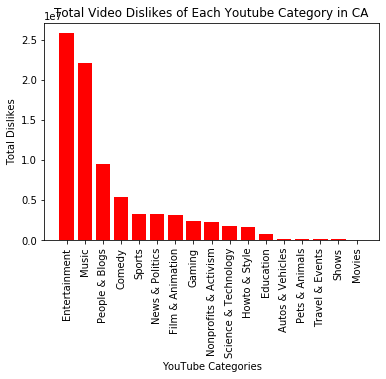

In [31]:
# CA Category Analysis - TOP DISLIKED
#Finding the Sum of Dislikes 
Dislikes_Category_CA=ca_df.groupby('Category ID').sum()["Dislikes"]
Dislikes_Category_CA_df=pd.DataFrame(Dislikes_Category_CA)
Dislikes_Category_CA_df=Dislikes_Category_CA_df.reset_index()
Dislikes_Category_CA_df=Dislikes_Category_CA_df.sort_values("Dislikes",ascending=False)
Dislikes_Category_CA_df

# create labels
catdislikes_labels_ca = Dislikes_Category_CA_df["Category ID"]

# create bar plot that shows all views, likes, dislikes for each category
plt.bar(catdislikes_labels_ca,Dislikes_Category_CA_df["Dislikes"], color="r",alpha=1,align="center")
plt.xticks(catdislikes_labels_ca, rotation='vertical')
plt.ylabel("Total Dislikes")
plt.xlabel("YouTube Categories")
plt.title("Total Video Dislikes of Each Youtube Category in CA")

# Videos Analysis

## Top Viewed Videos in Each Country

Text(0.5, 1.0, 'Total Views of the Top Five Viewed US Videos')

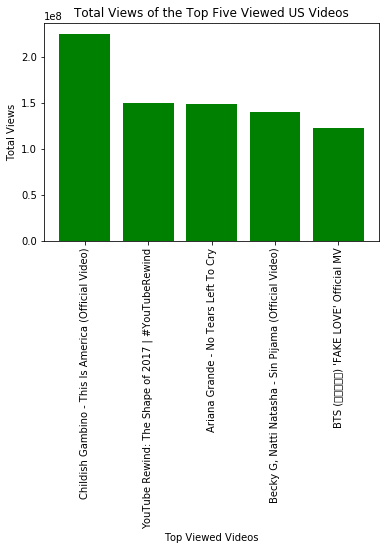

In [35]:
# US Video Analysis - TOP VIEWED
# lose duplicate videos and find maximum amount of views
videoviews_us=pd.DataFrame(us_df.groupby("Title").max()["Views"])
top_views_us=videoviews_us.sort_values("Views",ascending=False)
top_views_us=top_views_us.reset_index()
# save the top five viewed videos to a dataframe
top_5_views_us = top_views_us.head(5)
# create bar plot showing the top five viewed videos in the US
plt.bar(top_5_views_us["Title"],top_5_views_us["Views"], color="green")
plt.xticks(top_5_views_us["Title"], rotation='vertical')
plt.ylabel("Total Views")
plt.xlabel("Top Viewed Videos")
plt.title("Total Views of the Top Five Viewed US Videos")

Text(0.5, 1.0, 'Total Views of the Top Five Viewed GB Videos')

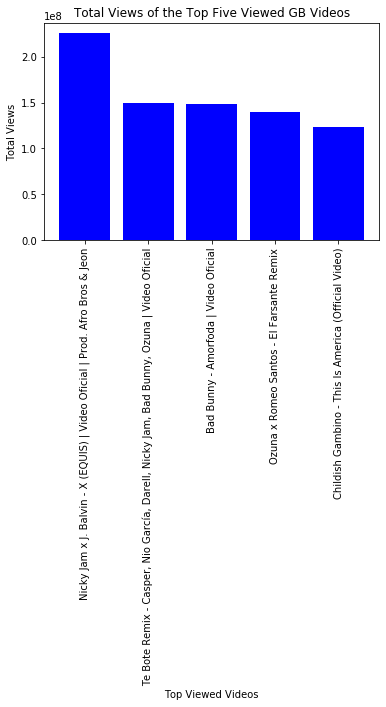

In [36]:
# GB Video Analysis - TOP VIEWED
# lose duplicate videos and find maximum amount of views
videoviews_gb=pd.DataFrame(gb_df.groupby("Title").max()["Views"])
top_views_gb=videoviews_gb.sort_values("Views",ascending=False)
top_views_gb=top_views_gb.reset_index()
# save the top five viewed videos to a dataframe
top_5_views_gb = top_views_gb.head(5)
# create bar plot showing the top five viewed videos in GB
plt.bar(top_5_views_gb["Title"],top_5_views_us["Views"], color="blue")
plt.xticks(top_5_views_gb["Title"], rotation='vertical')
plt.ylabel("Total Views")
plt.xlabel("Top Viewed Videos")
plt.title("Total Views of the Top Five Viewed GB Videos")

Text(0.5, 1.0, 'Total Views of the Top Five Viewed CA Videos')

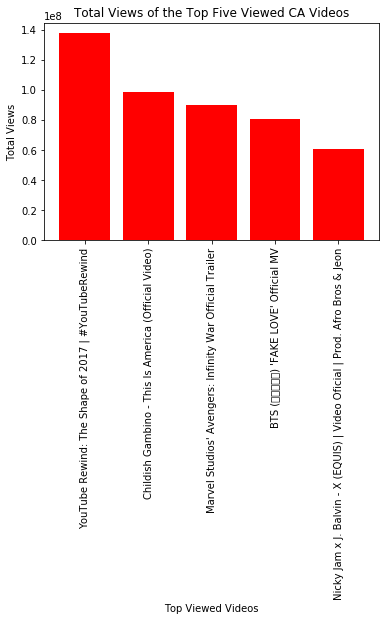

In [37]:
# CA Video Analysis - TOP VIEWED
# lose duplicate videos and find maximum amount of views
videoviews_ca=pd.DataFrame(ca_df.groupby("Title").max()["Views"])
top_views_ca=videoviews_ca.sort_values("Views",ascending=False)
top_views_ca=top_views_ca.reset_index()
# save the top five viewed videos to a dataframe
top_5_views_ca = top_views_ca.head(5)
# create bar plot showing the top five viewed videos in CA
plt.bar(top_5_views_ca["Title"],top_5_views_ca["Views"], color="red")
plt.xticks(top_5_views_ca["Title"], rotation='vertical')
plt.ylabel("Total Views")
plt.xlabel("Top Viewed Videos")
plt.title("Total Views of the Top Five Viewed CA Videos")

## Least Viewed Videos in Each Country

Text(0.5, 1.0, 'Total Views of the Bottom Five Viewed US Videos')

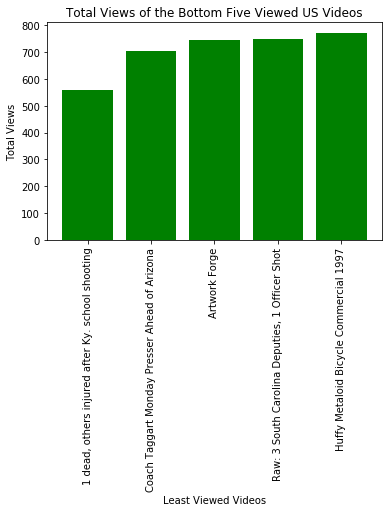

In [38]:
# US Video Analysis - LEAST VIEWED
# lose duplicate videos and find maximum amount of views
bottom_views_us=videoviews_us.sort_values("Views")
bottom_views_us=bottom_views_us.reset_index()
# save the top five viewed videos to a dataframe
bottom_5_views_us = bottom_views_us.head(5)
# create bar plot showing the bottom five viewed videos in the US
plt.bar(bottom_5_views_us["Title"],bottom_5_views_us["Views"], color="green")
plt.xticks(bottom_5_views_us["Title"], rotation='vertical')
plt.ylabel("Total Views")
plt.xlabel("Least Viewed Videos")
plt.title("Total Views of the Bottom Five Viewed US Videos")

Text(0.5, 1.0, 'Total Views of the Bottom Five Viewed GB Videos')

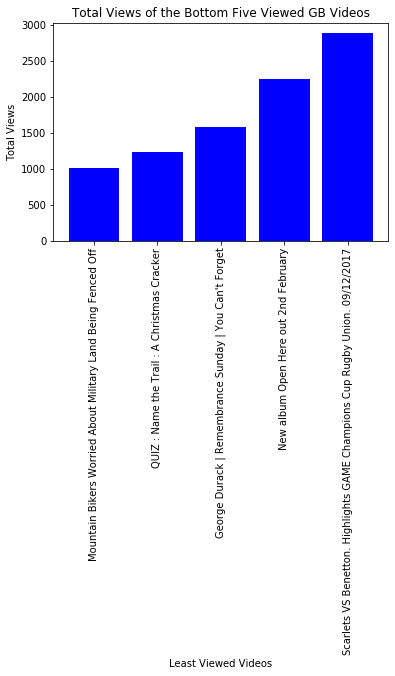

In [39]:
# GB Video Analysis - LEAST VIEWED
# lose duplicate videos and find maximum amount of views
bottom_views_gb=videoviews_gb.sort_values("Views")
bottom_views_gb=bottom_views_gb.reset_index()
# save the top five viewed videos to a dataframe
bottom_5_views_gb = bottom_views_gb.head(5)
# create bar plot showing the bottom five viewed videos in GB
plt.bar(bottom_5_views_gb["Title"],bottom_5_views_gb["Views"], color="blue")
plt.xticks(bottom_5_views_gb["Title"], rotation='vertical')
plt.ylabel("Total Views")
plt.xlabel("Least Viewed Videos")
plt.title("Total Views of the Bottom Five Viewed GB Videos")

Text(0.5, 1.0, 'Total Views of the Bottom Five Viewed CA Videos')

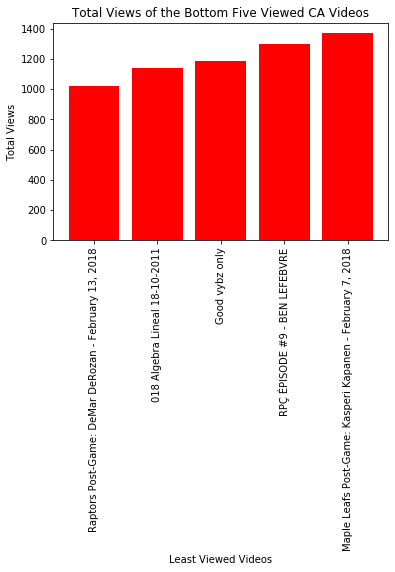

In [40]:
# CA Video Analysis - LEAST VIEWED
# lose duplicate videos and find maximum amount of views
bottom_views_ca=videoviews_ca.sort_values("Views")
bottom_views_ca=bottom_views_ca.reset_index()
# save the top five viewed videos to a dataframe
bottom_5_views_ca = bottom_views_ca.head(5)
# create bar plot showing the bottom five viewed videos in GB
plt.bar(bottom_5_views_ca["Title"],bottom_5_views_ca["Views"], color="red")
plt.xticks(bottom_5_views_ca["Title"], rotation='vertical')
plt.ylabel("Total Views")
plt.xlabel("Least Viewed Videos")
plt.title("Total Views of the Bottom Five Viewed CA Videos")

## Most Liked Videos in Each Country

Text(0.5, 1.0, 'Total Likes of the Top Five Liked US Videos')

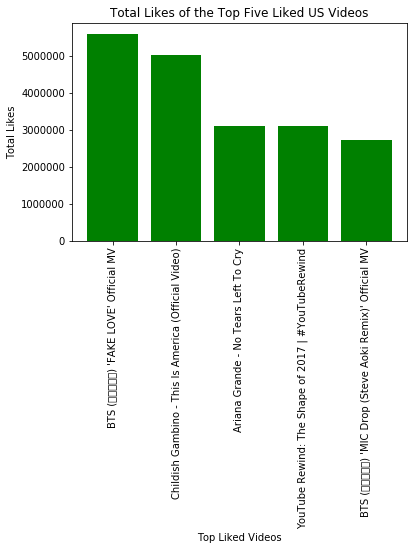

In [41]:
# US Video Analysis - MOST LIKED
# lose duplicate videos and find maximum amount of likes
videolikes_us=pd.DataFrame(us_df.groupby("Title").max()["Likes"])
liked_us=videolikes_us.sort_values("Likes", ascending=False)
liked_us=liked_us.reset_index()
# save the top five viewed videos to a dataframe
top_5_liked_us = liked_us.head(5)
# create bar plot showing the top five liked videos in the US
plt.bar(top_5_liked_us["Title"],top_5_liked_us["Likes"], color="green")
plt.xticks(top_5_liked_us["Title"], rotation='vertical')
plt.ylabel("Total Likes")
plt.xlabel("Top Liked Videos")
plt.title("Total Likes of the Top Five Liked US Videos")

Text(0.5, 1.0, 'Total Likes of the Top Five Liked GB Videos')

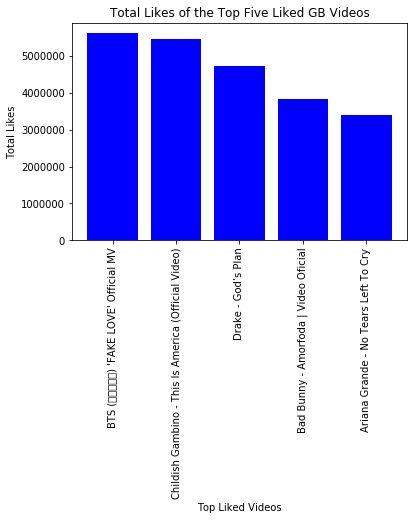

In [42]:
# GB Video Analysis - MOST LIKED
# lose duplicate videos and find maximum amount of views
videolikes_gb=pd.DataFrame(gb_df.groupby("Title").max()["Likes"])
liked_gb=videolikes_gb.sort_values("Likes", ascending=False)
liked_gb=liked_gb.reset_index()
# save the top five viewed videos to a dataframe
top_5_liked_gb = liked_gb.head(5)
# create bar plot showing the top five liked videos in GB
plt.bar(top_5_liked_gb["Title"],top_5_liked_gb["Likes"], color="blue")
plt.xticks(top_5_liked_gb["Title"], rotation='vertical')
plt.ylabel("Total Likes")
plt.xlabel("Top Liked Videos")
plt.title("Total Likes of the Top Five Liked GB Videos")

Text(0.5, 1.0, 'Total Likes of the Top Five Liked CA Videos')

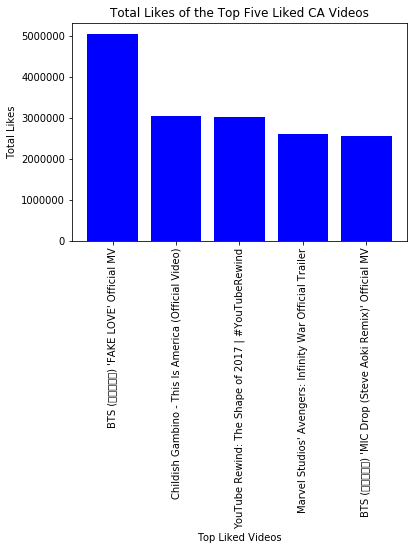

In [43]:
# CA Video Analysis - MOST LIKED
# lose duplicate videos and find maximum amount of views
videolikes_ca=pd.DataFrame(ca_df.groupby("Title").max()["Likes"])
liked_ca=videolikes_ca.sort_values("Likes", ascending=False)
liked_ca=liked_ca.reset_index()
# save the top five viewed videos to a dataframe
top_5_liked_ca = liked_ca.head(5)
# create bar plot showing the top five liked videos in GB
plt.bar(top_5_liked_ca["Title"],top_5_liked_ca["Likes"], color="blue")
plt.xticks(top_5_liked_ca["Title"], rotation='vertical')
plt.ylabel("Total Likes")
plt.xlabel("Top Liked Videos")
plt.title("Total Likes of the Top Five Liked CA Videos")

## Most Disliked Videos in Each Country

Text(0.5, 1.0, 'Total Dislikes of the Top Five Disliked US Videos')

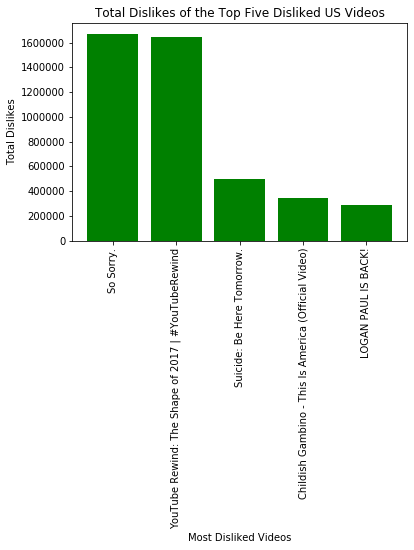

In [46]:
# US Video Analysis - MOST DISLIKED
# lose duplicate videos and find maximum amount of dislikes
videodislikes_us=pd.DataFrame(us_df.groupby("Title").max()["Dislikes"])
disliked_us=videodislikes_us.sort_values("Dislikes", ascending=False)
disliked_us=disliked_us.reset_index()
# save the top five viewed videos to a dataframe
top_5_disliked_us = disliked_us.head(5)
# create bar plot showing the five most disliked videos in the US
plt.bar(top_5_disliked_us["Title"],top_5_disliked_us["Dislikes"], color="green")
plt.xticks(top_5_disliked_us["Title"], rotation='vertical')
plt.ylabel("Total Dislikes")
plt.xlabel("Most Disliked Videos")
plt.title("Total Dislikes of the Top Five Disliked US Videos")

Text(0.5, 1.0, 'Total Dislikes of the Top Five Disliked GB Videos')

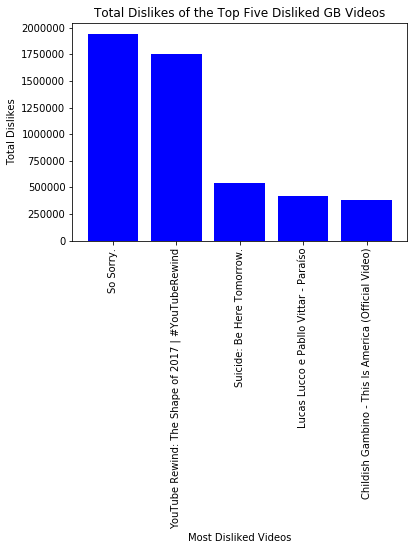

In [45]:
# GB Video Analysis - MOST DISLIKED
# lose duplicate videos and find maximum amount of dislikes
videodislikes_gb=pd.DataFrame(gb_df.groupby("Title").max()["Dislikes"])
disliked_gb=videodislikes_gb.sort_values("Dislikes", ascending=False)
disliked_gb=disliked_gb.reset_index()
# save the top five viewed videos to a dataframe
top_5_disliked_gb = disliked_gb.head(5)
# create bar plot showing the five most disliked videos in the US
plt.bar(top_5_disliked_gb["Title"],top_5_disliked_gb["Dislikes"], color="blue")
plt.xticks(top_5_disliked_gb["Title"], rotation='vertical')
plt.ylabel("Total Dislikes")
plt.xlabel("Most Disliked Videos")
plt.title("Total Dislikes of the Top Five Disliked GB Videos")

Text(0.5, 1.0, 'Total Dislikes of the Top Five Disliked CA Videos')

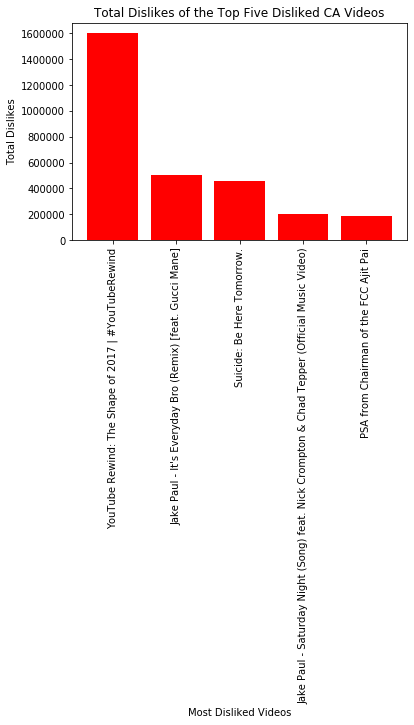

In [47]:
# CA Video Analysis - MOST DISLIKED
# lose duplicate videos and find maximum amount of dislikes
videodislikes_ca=pd.DataFrame(ca_df.groupby("Title").max()["Dislikes"])
disliked_ca=videodislikes_ca.sort_values("Dislikes", ascending=False)
disliked_ca=disliked_ca.reset_index()
# save the top five viewed videos to a dataframe
top_5_disliked_ca = disliked_ca.head(5)
# create bar plot showing the five most disliked videos in the US
plt.bar(top_5_disliked_ca["Title"],top_5_disliked_ca["Dislikes"], color="red")
plt.xticks(top_5_disliked_ca["Title"], rotation='vertical')
plt.ylabel("Total Dislikes")
plt.xlabel("Most Disliked Videos")
plt.title("Total Dislikes of the Top Five Disliked CA Videos")

# Channels Analysis

In [50]:
# US Channel Analysis - FOCUSING
# Focus on Data we need
channel_data_us = us_df.loc[:,("Channel Title", "Views", "Likes", "Dislikes")]

# sum the views, likes, and dislikes for each channel
topviewedchannel_us = channel_data_us.groupby("Channel Title").sum()["Views"]
toplikedchannel_us = channel_data_us.groupby("Channel Title").sum()["Likes"]
topdislikedchannel_us = channel_data_us.groupby("Channel Title").sum()["Dislikes"]

# create a dataframe of the total views, likes, and dislikes of each channel
channel_summary_us = pd.DataFrame({"Total Views":topviewedchannel_us,
                               "Total Likes":toplikedchannel_us,
                               "Total Dislikes":topdislikedchannel_us})


In [51]:
# GB Channel Analysis - FOCUSING
# Focus on Data we need
channel_data_gb = gb_df.loc[:,("Channel Title", "Views", "Likes", "Dislikes")]

# sum the views, likes, and dislikes for each channel
topviewedchannel_gb = channel_data_gb.groupby("Channel Title").sum()["Views"]
toplikedchannel_gb = channel_data_gb.groupby("Channel Title").sum()["Likes"]
topdislikedchannel_gb = channel_data_gb.groupby("Channel Title").sum()["Dislikes"]

# create a dataframe of the total views, likes, and dislikes of each channel
channel_summary_gb = pd.DataFrame({"Total Views":topviewedchannel_gb,
                               "Total Likes":toplikedchannel_gb,
                               "Total Dislikes":topdislikedchannel_gb})


In [52]:
# CA Channel Analysis - FOCUSING
# Focus on Data we need
channel_data_ca = ca_df.loc[:,("Channel Title", "Views", "Likes", "Dislikes")]

# sum the views, likes, and dislikes for each channel
topviewedchannel_ca = channel_data_ca.groupby("Channel Title").sum()["Views"]
toplikedchannel_ca = channel_data_ca.groupby("Channel Title").sum()["Likes"]
topdislikedchannel_ca = channel_data_ca.groupby("Channel Title").sum()["Dislikes"]

# create a dataframe of the total views, likes, and dislikes of each channel
channel_summary_ca = pd.DataFrame({"Total Views":topviewedchannel_ca,
                               "Total Likes":toplikedchannel_ca,
                               "Total Dislikes":topdislikedchannel_ca})


## Most Viewed Channels in Each Country

Text(0.5, 1.0, 'Total top 5 Viewed YouTube Channels in the US')

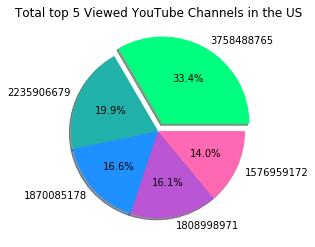

In [72]:
# US Channel Analysis - MOST VIEWED
#sort channel views in descending order (largest values at the top)
topchannelviews_us = channel_summary_us.sort_values("Total Views", ascending=False)
#top 5 viewed channels
top_5_viewedchannels_us = topchannelviews_us[:5].reset_index()

# create a pie chart to show the top 5 viewed YouTube Channels
explode = (0.1, 0, 0, 0, 0)
colors = ["springgreen", "lightseagreen", "dodgerblue", "mediumorchid", "hotpink"]
plt.pie(top_5_viewedchannels_us["Total Views"], explode=explode, labels=top_5_viewedchannels_us["Total Views"], colors = colors, autopct="%1.1f%%", shadow=True)
plt.title("Total top 5 Viewed YouTube Channels in the US")

Text(0.5, 1.0, 'Total top 5 Viewed YouTube Channels in GB')

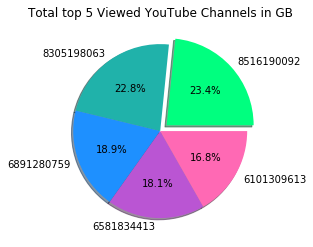

In [73]:
# GB Channel Analysis - MOST VIEWED
#sort channel views in descending order (largest values at the top)
topchannelviews_gb = channel_summary_gb.sort_values("Total Views", ascending=False)
#top 5 viewed channels
top_5_viewedchannels_gb = topchannelviews_gb[:5].reset_index()

# create a pie chart to show the top 5 viewed YouTube Channels
explode = (0.1, 0, 0, 0, 0)
colors = ["springgreen", "lightseagreen", "dodgerblue", "mediumorchid", "hotpink"]
plt.pie(top_5_viewedchannels_gb["Total Views"], explode=explode, labels=top_5_viewedchannels_gb["Total Views"], colors = colors, autopct="%1.1f%%", shadow=True)
plt.title("Total top 5 Viewed YouTube Channels in GB")

Text(0.5, 1.0, 'Total top 5 Viewed YouTube Channels in CA')

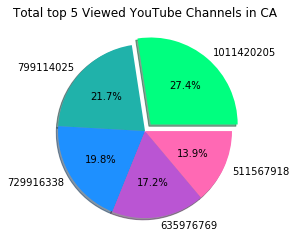

In [74]:
# CA Channel Analysis - MOST VIEWED
#sort channel views in descending order (largest values at the top)
topchannelviews_ca = channel_summary_ca.sort_values("Total Views", ascending=False)
#top 5 viewed channels
top_5_viewedchannels_ca = topchannelviews_ca[:5].reset_index()

# create a pie chart to show the top 5 viewed YouTube Channels
explode = (0.1, 0, 0, 0, 0)
colors = ["springgreen", "lightseagreen", "dodgerblue", "mediumorchid", "hotpink"]
plt.pie(top_5_viewedchannels_ca["Total Views"], explode=explode, labels=top_5_viewedchannels_ca["Total Views"], colors = colors, autopct="%1.1f%%", shadow=True)
plt.title("Total top 5 Viewed YouTube Channels in CA")

## Least Viewed Channels in Each Country

In [68]:
# US Channel Analysis - LEAST VIEWED
#sort channel views in ascending order (lowest values at the top)
lowchannelviews_us = channel_summary_us.sort_values("Total Views")
#bottom 5 viewed channels
bottom_5_viewedchannels_us = lowchannelviews_us[:5].reset_index()
bottom_5_viewedchannels_us

Channel Title  Total Views  Total Likes  \
0                       90s Commercials          773            2   
1                         GoDucksdotcom         1391           20   
2  OjO Commuter Scooter by OjO Electric         1706            6   
3                          Total Combat         1722           17   
4                           CHauserable         1807            6   

   Total Dislikes  
0               0  
1               4  
2               1  
3               3  
4               3

In [56]:
# GB Channel Analysis - LEAST VIEWED
#sort channel views in ascending order (lowest values at the top)
lowchannelviews_gb = channel_summary_gb.sort_values("Total Views")
#bottom 5 viewed channels
bottom_5_viewedchannels_gb = lowchannelviews_gb[:5]

In [58]:
# CA Channel Analysis - LEAST VIEWED
#sort channel views in ascending order (lowest values at the top)
lowchannelviews_ca = channel_summary_ca.sort_values("Total Views")
#bottom 5 viewed channels
bottom_5_viewedchannels_ca = lowchannelviews_ca[:5]

## Most Liked Channels in Each Country

In [69]:
# US Channel Analysis - MOST LIKED
#sort channel likes in descending order (largest values at the top)
topchannellikes_us = channel_summary_us.sort_values("Total Likes", ascending=False)
#top 5 liked channels
top_5_likedchannels_us = topchannellikes_us[:5].reset_index()
top_5_likedchannels_us

Channel Title  Total Views  Total Likes  Total Dislikes
0               ibighit   2235906679    199247121         3467306
1   ChildishGambinoVEVO   3758488765     96700818         6054434
2          Dude Perfect   1870085178     60275557         1501477
3  Marvel Entertainment   1808998971     55873344         1031250
4      ArianaGrandeVevo   1576959172     52170970         1931230

In [60]:
# GB Channel Analysis - MOST LIKED
#sort channel likes in descending order (largest values at the top)
topchannellikes_gb = channel_summary_gb.sort_values("Total Likes", ascending=False)
#top 5 liked channels
top_5_likedchannels_gb = topchannellikes_gb[:5].reset_index()

In [61]:
# CA Channel Analysis - MOST LIKED
#sort channel likes in descending order (largest values at the top)
topchannellikes_ca = channel_summary_ca.sort_values("Total Likes", ascending=False)
#top 5 liked channels
top_5_likedchannels_ca = topchannellikes_ca[:5].reset_index()

## Most Disliked Channels in Each Country

In [70]:
# US Channel Analysis - MOST DISLIKED
#sort channel dislikes in descending order (largest values at the top)
topchanneldislikes_us = channel_summary_us.sort_values("Total Dislikes", ascending=False)
#top 5 disliked channels
top_5_dislikedchannels_us = topchanneldislikes_us[:5].reset_index()
top_5_dislikedchannels_us

Channel Title  Total Views  Total Likes  Total Dislikes
0     Logan Paul Vlogs    484356303     31545290        13847251
1    YouTube Spotlight    791388476     20173324        10924092
2  ChildishGambinoVEVO   3758488765     96700818         6054434
3         Call of Duty    315404711     11553594         5644083
4              ibighit   2235906679    199247121         3467306

In [63]:
# GB Channel Analysis - MOST DISLIKED
#sort channel dislikes in descending order (largest values at the top)
topchanneldislikes_gb = channel_summary_gb.sort_values("Total Dislikes", ascending=False)
#top 5 disliked channels
top_5_dislikedchannels_gb = topchanneldislikes_gb[:5].reset_index()

In [64]:
# CA Channel Analysis - MOST DISLIKED
#sort channel dislikes in descending order (largest values at the top)
topchanneldislikes_ca = channel_summary_ca.sort_values("Total Dislikes", ascending=False)
#top 5 disliked channels
top_5_dislikedchannels_ca = topchanneldislikes_ca[:5].reset_index()

## Visuals Showing Top Viewed Channels and their Likes

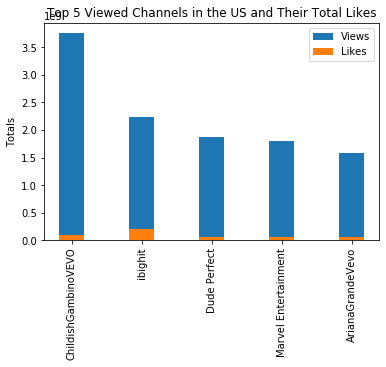

In [79]:
# US Channel Analysis - VIEWS AND LIKES
labels = top_5_viewedchannels_us["Channel Title"]
width = 0.35 

fig, ax = plt.subplots()

plt.bar(labels, top_5_viewedchannels_us["Total Views"], width, label='Views')
plt.bar(labels, top_5_viewedchannels_us["Total Likes"], width, label='Likes')

plt.ylabel('Totals')
plt.xticks(top_5_viewedchannels_us["Channel Title"], rotation='vertical')
plt.title('Top 5 Viewed Channels in the US and Their Total Likes')
plt.legend()

plt.show()

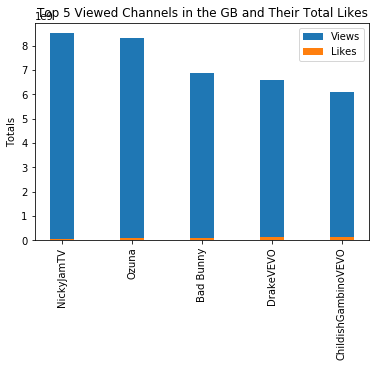

In [80]:
# GB Channel Analysis - VIEWS AND LIKES
labels = top_5_viewedchannels_gb["Channel Title"]
width = 0.35 

fig, ax = plt.subplots()

plt.bar(labels, top_5_viewedchannels_gb["Total Views"], width, label='Views')
plt.bar(labels, top_5_viewedchannels_gb["Total Likes"], width, label='Likes')

plt.ylabel('Totals')
plt.xticks(top_5_viewedchannels_gb["Channel Title"], rotation='vertical')
plt.title('Top 5 Viewed Channels in the GB and Their Total Likes')
plt.legend()

plt.show()

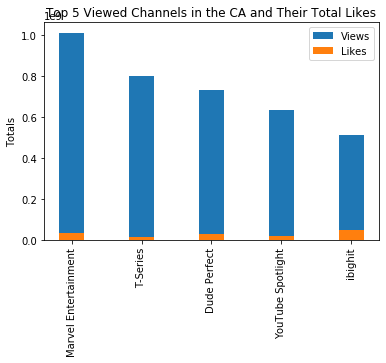

In [81]:
# CA Channel Analysis - VIEWS AND LIKES
labels = top_5_viewedchannels_ca["Channel Title"]
width = 0.35 

fig, ax = plt.subplots()

plt.bar(labels, top_5_viewedchannels_ca["Total Views"], width, label='Views')
plt.bar(labels, top_5_viewedchannels_ca["Total Likes"], width, label='Likes')

plt.ylabel('Totals')
plt.xticks(top_5_viewedchannels_ca["Channel Title"], rotation='vertical')
plt.title('Top 5 Viewed Channels in the CA and Their Total Likes')
plt.legend()

plt.show()